In [1]:
import numpy as np
import random
import math
import time
import copy
import matplotlib.pyplot as plt

In [2]:
class TicTacToeMDP:
    
    """
    Class to represent a Markov Decision Process (MDP) for the game of Tic Tac Toe.
 
    Attributes:
    - board: numpy.ndarray
        3x3 array representing the Tic Tac Toe board.
    - nrows: int
        Number of rows on the Tic Tac Toe board. 
    - ncols: int
        Number of columns on the Tic Tac Toe board. 
    """
 
    def __init__(self, rows = 3, cols = 3):
        
        """
        Constructor to initialize the TicTacToeMDP class.
 
        Initializes an empty 3x3 board.
        """
        
        # Creating an empty 3x3 board
        self.board = np.empty((rows, cols), dtype = str)
        self.board.fill(' ')
        
        self.nrows = rows
        self.ncols = cols
        self.nstates = rows * cols
        

In [3]:
def get_valid_actions(mdp, state):

    """
    Returns a list of valid actions that can be taken in the current state.

    Parameters:
    - mdp: class
    - state: list
        List of the current state

    Returns:
    - list:
        List of (row, column) tuples representing the set of all actions available
    """

    A = []

    original_shape = (mdp.nrows, mdp.ncols)  
    current_board = np.array(state).reshape(original_shape)

    # Looping through each cell on the board
    for i in range(mdp.nrows):
        for j in range(mdp.ncols):
            # Checking if the cell is empty
            if current_board[i, j] == ' ':
                # Adding the empty cell as a valid action
                A.append((i, j))

    return A


In [4]:
def check_winner(mdp, state):

    """
    Checks if any player has won the game.

    Parameters:
    - mdp: class
    - state: list
        The current state of the board
    - player: str
        The player to check for winning, either 'X' or 'O'.

    Returns:
    - str:
        Returns 'X' if player 'X' has won, 'O' if player 'O' has won, 'T' if there was a tie, and None if 
        no one has won or tied yet
    """
    
    original_shape = (mdp.nrows, mdp.ncols) 
    state = np.array(state).reshape(original_shape)

    # Checking rows
    for i in range(mdp.nrows):
        if state[i, 0] == state[i, 1] == state[i, 2] == 'X':
            return 'X'
        elif state[i, 0] == state[i, 1] == state[i, 2] == 'O':
            return 'O'

    # Checking columns
    for j in range(mdp.ncols):
        if state[0, j] == state[1, j] == state[2, j] == 'X':
            return 'X'
        elif state[0, j] == state[1, j] == state[2, j] == 'O':
            return 'O'

    # Checking diagonals
    if state[0, 0] == state[1, 1] == state[2, 2] == 'X':
        return 'X'
    elif state[0, 0] == state[1, 1] == state[2, 2] == 'O':
        return 'O'
    
    if state[0, 2] == state[1, 1] == state[2, 0] == 'X':
        return 'X'
    elif state[0, 2] == state[1, 1] == state[2, 0] == 'O':
        return 'O'
    
    # Checking for tie game
    if ' ' not in state:
        return 'T'

    return None


In [5]:
def take_action(mdp, state, action, player):
        
    """
    Takes an action and updates the board state accordingly.

    Parameters:
    - mdp: class
    - state: list
        List of the current state
    - action: tuple
        (row, column) tuple representing the cell where the current player wants to place their mark.
    - player: str
        Current player's symbol 

    Raises:
    - ValueError:
        Raises an error if the action is invalid (cell is already occupied or game is already finished).
        
    Returns: 
    - list:
        List of tuples representing states after action was made
    """
    
    original_shape = (mdp.nrows, mdp.ncols) 
    state = np.array(state).reshape(original_shape)

    # Checking if the game is already finished
    if check_winner(mdp, state) is not None:
        raise ValueError('Game is already finished.')

    # Extracting the row and column from the action
    row, col = action

    # Checking if the cell is already occupied
    if state[row, col] != ' ':
        raise ValueError('Cell is already occupied.')

    # Placing the mark of the current player on the board
    state[row, col] = player
    
    state = tuple(state.flatten())
    
    return state
      

In [6]:
def rotate(board, degrees):
    
    """
    Takes the current board and rotates the board by a certain degree amount.

    Parameters:
    - board: list
        List of the current board
    - degrees: int
        Degrees the board will rotate by 
        
    Returns: 
    - list:
        List of the current board rotated
    """
    
    if degrees == 90:
        return [
            board[6], board[3], board[0],
            board[7], board[4], board[1],
            board[8], board[5], board[2]
        ]
    elif degrees == 180:
        return [
            board[8], board[7], board[6],
            board[5], board[4], board[3],
            board[2], board[1], board[0]
        ]
    elif degrees == 270:
        return [
            board[2], board[5], board[8],
            board[1], board[4], board[7],
            board[0], board[3], board[6]
        ]


In [7]:
def reflect(board, direction):
    
    """
    Takes the current board and reflects the board in a direction.

    Parameters:
    - board: list
        List of the current board
    - direction: str
        Direction the board will reflect 
        
    Returns: 
    - list:
        List of the current board reflected
    """
    
    if direction == 'horizontal':
        return [
            board[2], board[1], board[0],
            board[5], board[4], board[3],
            board[8], board[7], board[6]
        ]
    elif direction == 'vertical':
        return [
            board[6], board[7], board[8],
            board[3], board[4], board[5],
            board[0], board[1], board[2]
        ]
    elif direction == 'diagonal1':
        # Top left to bottom right
        return [
            board[0], board[3], board[6],
            board[1], board[4], board[7],
            board[2], board[5], board[8]
        ]
    elif direction == 'diagonal2':
        # Bottom left to top right
        return [
            board[8], board[5], board[2],
            board[7], board[4], board[1],
            board[6], board[3], board[0]
        ]
    

In [8]:
class Board:
    
    """
    Class to represent Tic Tac Toe board for the algorithms' setups.
    
    Attributes will not be explained since they won't be used in the algorithms
    """
    
    def __init__(self, parent = None):
        
        """
        Constructor to initialize the Board class.
 
        Initializes an empty 3x3 board.
        """
        
        self.id = 0
        self.cells = []
        self.symmetries = []
        self.parents = []
        self.children = []
        self.result = False
        
        if parent:
            self.parents.append(parent.id)
            self.cells.extend(parent.cells)
            self.level = parent.level + 1
        else:
            self.cells = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
            self.level = 0

    def addSymmetry(self, symmetry):
        
        if symmetry not in self.symmetries:
            self.symmetries.append(symmetry)

    def addChild(self, id):
        
        if id not in self.children:
            self.children.append(id)

    def addParent(self, id):
        
        if id not in self.parents:
            self.parents.append(id)

    def isLive(self):
        
        winLines = [
          [0,1,2], # Row 1
          [3,4,5], # Row 2
          [6,7,8], # Row 3
          [0,3,6], # Column 1
          [1,4,7], # Column 2
          [2,5,8], # Column 3
          [0,4,8], # Top left to bottom right
          [6,4,2]  # Bottom left to top right
        ]
        # Checking if there is a winner
        for line in range(len(winLines)):
            rule = winLines[line]
            if (self.cells[rule[0]] == self.cells[rule[1]]
                and self.cells[rule[0]] == self.cells[rule[2]]
                and self.cells[rule[0]] != ' '):
                self.result = self.cells[rule[0]]
                return False
        # Checking if there are available spots to play
        if ' ' in self.cells:
            # Since there are spots to play and no winner, the game can continue
            return True
        else:
            # Since there are no spots to play and no winner, the game is a tie game
            self.result = 'draw'
            return False

    def nextPlayer(self):
        
        e = 0
        x = 0
        o = 0
        for cell in self.cells:
            if cell == ' ':
                e += 1
            if cell == 'X':
                x += 1
            if cell == 'O':
                o += 1
        # X begins, then players alternate
        if e == 9 or o >= x:
            return 'X'
        else:
            return 'O'

    def findSimilar(self, sources):
        
        unique = True
        match = False

        def sameBoard(a, b):
        
            for i in range(len(a)):
                if a[i] != b[i]:
                    return False
            return True

        # Iterate over sources (boards + queue)
        for source in range(len(sources)):
            # And all boards to look for duplicates
            for board in range(len(sources[source])):
                target = sources[source][board]
                if sameBoard(target.cells, self.cells):
                    target.addSymmetry('duplicate')
                    target.addParent(self.parents[0])
                    match = target.id
                    unique = False
                # Look for rotational symmetry
                #if sameBoard(rotate(target.cells, 90), self.cells):
                    #target.addSymmetry('rotational')
                    #target.addParent(self.parents[0])
                    #match = target.id
                    #unique = False
                # Look for rotational symmetry
                #if sameBoard(rotate(target.cells, 180), self.cells):
                    #target.addSymmetry('rotational')
                    #target.addParent(self.parents[0])
                    #match = target.id
                    #unique = False
                # Look for rotational symmetry
                #if sameBoard(rotate(target.cells, 270), self.cells):
                    #target.addSymmetry('rotational')
                    #target.addParent(self.parents[0])
                    #match = target.id
                    #unique = False
                # Look for reflectional symmetry
                #if sameBoard(reflect(target.cells, 'horizontal'), self.cells):
                    #target.addSymmetry('reflectional')
                    #target.addParent(self.parents[0])
                    #match = target.id
                    #unique = False
                # Look for reflectional symmetry
                #if sameBoard(reflect(target.cells, 'vertical'), self.cells):
                    #target.addSymmetry('reflectional')
                    #target.addParent(self.parents[0])
                    #match = target.id
                    #unique = False
                # Look for reflectional symmetry
                #if sameBoard(reflect(target.cells, 'diagonal1'), self.cells):
                    #target.addSymmetry('reflectional')
                    #target.addParent(self.parents[0])
                    #match = target.id
                    #unique = False
                # Look for reflectional symmetry
                #if sameBoard(reflect(target.cells, 'diagonal2'), self.cells):
                    #target.addSymmetry('reflectional')
                    #target.addParent(self.parents[0])
                    #match = target.id
                    #unique = False

        return {'unique': unique, 'match': match}


In [9]:
def get_states(board):
    
    """
    Generates all the unique states of tic tac toe game.

    Parameters:
    - board: class 
        Empty tic tac toe board

    Returns:
    - list:
        List of all the unique states
    """

    boards = []
    queue = []
    nextId = 1

    # Add a blank board to the queue
    queue.append(board)

    # While there are still boards in the queue, generate unique children for the queue
    # before moving the board to the collection
    while len(queue) > 0:
        # Pull first board from queue
        board = queue.pop(0)

        # Checking if the game has ended 
        if board.isLive():
            # Generate all candidate children for all combinations
            for cell in range(len(board.cells)):
                child = Board(board)
                if child.cells[cell] == ' ':
                    child.id = nextId
                    child.cells[cell] = child.nextPlayer()
                    # Determine if generated child is unique
                    results = child.findSimilar([boards, queue])
                    if results['unique']:
                        # Unique children are added to queue to generate subsequent boards (plays)
                        queue.append(child)
                        # The child is associated with the parent
                        board.addChild(child.id)
                        nextId += 1
                    elif results['match']:
                        # If the child is a duplicate, the match is associated with the parent
                        board.addChild(results['match'])

        # Move board into collection
        boards.append(board)
    
    final = []
    for board in boards:
        # First restriction, state must be ongoing
        if board.isLive():
            final.append(board.cells)
    
    # We are only including those states with equal number of X and O (5478 states without this restriction 
    # and the first restriction)
    final = [element for element in final if element.count('X') == element.count('O')]
    
    return final


In [10]:
def original_VI(tictactoe, gamma):
    
    eps = 1e-10
    initial_t = time.time()
    
    board = Board()
    states = get_states(board)
    y = {tuple(state): 0 for state in states} 
    policy = {tuple(state): None for state in states}
    
    while True:
        delta = 0
        y_prime = copy.deepcopy(y)
        for state in states:
            action_values = []
            actions = get_valid_actions(tictactoe, state)
            for action in actions:
                expected_value = 0
                action_state = take_action(tictactoe, state, action, 'X')
                if check_winner(tictactoe, action_state) == 'X':
                    action_values.append((-1, action)) 
                elif check_winner(tictactoe, action_state) == 'T':
                    action_values.append((0, action)) 
                else:
                    opponent_moves = get_valid_actions(tictactoe, action_state)
                    prob = 1 / len(opponent_moves)
                    for move in opponent_moves:
                        next_state = take_action(tictactoe, action_state, move, 'O')
                        if check_winner(tictactoe, next_state) == 'O':
                            expected_value += 1
                        else: 
                            expected_value += gamma * prob * y[next_state]
                        
                    action_values.append((expected_value, action))
                    
            y_prime[tuple(state)] = min(action_values)[0]
            policy[tuple(state)] = min(action_values)[1]
            delta = max(delta, abs(y[tuple(state)] - y_prime[tuple(state)])) 
            
        if delta <= eps:
            final_t = time.time() - initial_t
            
            return policy, final_t
        
        y = y_prime
                       

In [11]:
def random_VI(tictactoe, gamma, proportion):
    
    eps = 1e-10
    initial_t = time.time()
    
    board = Board()
    states = get_states(board)
    y = {tuple(state): 0 for state in states} 
    policy = {tuple(state): None for state in states}
    
    while True:
        delta = 0
        y_prime = copy.deepcopy(y)
        length = round(proportion * len(states))
        sub_states = random.sample(states, length)
        for state in sub_states:
            action_values = []
            actions = get_valid_actions(tictactoe, state)
            for action in actions:
                expected_value = 0
                action_state = take_action(tictactoe, state, action, 'X')
                if check_winner(tictactoe, action_state) == 'X':
                    action_values.append((-1, action)) 
                elif check_winner(tictactoe, action_state) == 'T':
                    action_values.append((0, action)) 
                else:
                    opponent_moves = get_valid_actions(tictactoe, action_state)
                    prob = 1 / len(opponent_moves)
                    for move in opponent_moves:
                        next_state = take_action(tictactoe, action_state, move, 'O')
                        if check_winner(tictactoe, next_state) == 'O':
                            expected_value += 1
                        else: 
                            expected_value += gamma * prob * y[next_state]
                        
                    action_values.append((expected_value, action))
                    
            y_prime[tuple(state)] = min(action_values)[0]
            policy[tuple(state)] = min(action_values)[1]
            delta = max(delta, abs(y[tuple(state)] - y_prime[tuple(state)])) 
            
        if delta <= eps:
            final_t = time.time() - initial_t
            
            return policy, final_t
        
        y = y_prime
        

In [12]:
def cyclic_VI(tictactoe, gamma): 
    
    eps = 1e-10
    initial_t = time.time()
    
    board = Board()
    states = get_states(board)
    y = {tuple(state): 0 for state in states} 
    policy = {tuple(state): None for state in states}
    
    while True:
        delta = 0
        y_prime = copy.deepcopy(y)
        for state in states:
            action_values = []
            actions = get_valid_actions(tictactoe, state)
            for action in actions:
                expected_value = 0
                action_state = take_action(tictactoe, state, action, 'X')
                if check_winner(tictactoe, action_state) == 'X':
                    action_values.append((-1, action)) 
                elif check_winner(tictactoe, action_state) == 'T':
                    action_values.append((0, action)) 
                else:
                    opponent_moves = get_valid_actions(tictactoe, action_state)
                    prob = 1 / len(opponent_moves)
                    for move in opponent_moves:
                        next_state = take_action(tictactoe, action_state, move, 'O')
                        if check_winner(tictactoe, next_state) == 'O':
                            expected_value += 1
                        else: 
                            expected_value += gamma * prob * y[next_state]
                        
                    action_values.append((expected_value, action))
                    
            y[tuple(state)] = min(action_values)[0]
            policy[tuple(state)] = min(action_values)[1]
            delta = max(delta, abs(y[tuple(state)] - y_prime[tuple(state)])) 
            
        if delta <= eps:
            final_t = time.time() - initial_t
            
            return policy, final_t
        

In [13]:
def randperm_cyclic_VI(tictactoe, gamma): 
    
    eps = 1e-10
    initial_t = time.time()
    
    board = Board()
    states = get_states(board)
    y = {tuple(state): 0 for state in states} 
    policy = {tuple(state): None for state in states}
    
    while True:
        delta = 0
        y_prime = copy.deepcopy(y)
        random.shuffle(states)
        for state in states:
            action_values = []
            actions = get_valid_actions(tictactoe, state)
            for action in actions:
                expected_value = 0
                action_state = take_action(tictactoe, state, action, 'X')
                if check_winner(tictactoe, action_state) == 'X':
                    action_values.append((-1, action)) 
                elif check_winner(tictactoe, action_state) == 'T':
                    action_values.append((0, action)) 
                else:
                    opponent_moves = get_valid_actions(tictactoe, action_state)
                    prob = 1 / len(opponent_moves)
                    for move in opponent_moves:
                        next_state = take_action(tictactoe, action_state, move, 'O')
                        if check_winner(tictactoe, next_state) == 'O':
                            expected_value += 1
                        else: 
                            expected_value += gamma * prob * y[next_state]
                        
                    action_values.append((expected_value, action))
                    
            y[tuple(state)] = min(action_values)[0]
            policy[tuple(state)] = min(action_values)[1]
            delta = max(delta, abs(y[tuple(state)] - y_prime[tuple(state)])) 
            
        if delta <= eps:
            final_t = time.time() - initial_t
            
            return policy, final_t
        

In [14]:
# SETUP
 
game = TicTacToeMDP()
gammas = [0.25, 0.50, 0.75, 1]
# Proportion: 1 is not included since this would be the same as original VI
proportions = [0.25, 0.50, 0.75, 0.90]


In [15]:
# Check for convergence with different gamma values (and proportion for random VI)

oVI_times = []
rVI_times = []
cVI_times = []
rpcVI_times = []

for gamma in gammas:
    for proportion in proportions:
        # Original VI
        policy_oVI, time_oVI = original_VI(game, gamma)
        # Random VI
        policy_rVI, time_rVI = random_VI(game, gamma, proportion)
        # Cyclic VI
        policy_cVI, time_cVI = cyclic_VI(game, gamma)
        # Random Permutation Cyclic VI
        policy_rpcVI, time_rpcVI = randperm_cyclic_VI(game, gamma)
        
        # Check all algorithms return same policy
        if policy_oVI == policy_rVI == policy_cVI == policy_rpcVI:
            print("The policies are the same with gamma: " + str(gamma) + " and proportion: " + str(proportion))
        elif policy_oVI == policy_rpcVI == policy_cVI != policy_rVI:
            print("Random VI was different with gamma: " + str(gamma) + " and proportion: " + str(proportion))
        elif policy_oVI == policy_rpcVI == policy_rVI != policy_cVI:
            print("Cyclic VI was different with gamma: " + str(gamma) + " and proportion: " + str(proportion))
        elif policy_oVI == policy_rVI == policy_cVI != policy_rpcVI:
            print("Random Permutation Cyclic VI was different with gamma: " + str(gamma) + " and proportion: " + 
                  str(proportion))
        
        oVI_times.append(time_oVI)
        rVI_times.append(time_rVI)
        cVI_times.append(time_cVI)
        rpcVI_times.append(time_rpcVI) 


Random VI was different with gamma: 0.25 and proportion: 0.25
Random VI was different with gamma: 0.25 and proportion: 0.5
The policies are the same with gamma: 0.25 and proportion: 0.75
The policies are the same with gamma: 0.25 and proportion: 0.9
Random VI was different with gamma: 0.5 and proportion: 0.25
Random VI was different with gamma: 0.5 and proportion: 0.5
Random VI was different with gamma: 0.5 and proportion: 0.75
The policies are the same with gamma: 0.5 and proportion: 0.9
Random VI was different with gamma: 0.75 and proportion: 0.25
The policies are the same with gamma: 0.75 and proportion: 0.5
The policies are the same with gamma: 0.75 and proportion: 0.75
The policies are the same with gamma: 0.75 and proportion: 0.9
Random VI was different with gamma: 1 and proportion: 0.25
Random VI was different with gamma: 1 and proportion: 0.5
The policies are the same with gamma: 1 and proportion: 0.75
The policies are the same with gamma: 1 and proportion: 0.9


In [16]:
# Check all the respective running times

print(oVI_times)
print(rVI_times)
print(cVI_times)
print(rpcVI_times)


[16.88510799407959, 16.51465606689453, 16.314723014831543, 17.552945852279663, 17.585856914520264, 17.596718072891235, 16.323665857315063, 17.609400033950806, 17.58247399330139, 17.56647300720215, 16.350389003753662, 17.526342153549194, 17.280858039855957, 16.426774740219116, 16.35990595817566, 17.528270959854126]
[20.07750129699707, 19.918029069900513, 20.1944260597229, 18.702080011367798, 21.18679904937744, 20.23628282546997, 19.745146989822388, 18.895308017730713, 19.046409130096436, 20.462467193603516, 18.13035798072815, 19.94814109802246, 19.598570823669434, 20.383121967315674, 18.257927894592285, 18.910140991210938]
[16.455300092697144, 17.527355909347534, 17.514869928359985, 16.38085103034973, 17.522478103637695, 16.2916738986969, 17.469954013824463, 17.502338647842407, 16.385496854782104, 17.533152103424072, 16.362606048583984, 17.62610912322998, 17.545129776000977, 17.542140007019043, 17.630335807800293, 16.43074917793274]
[15.388338088989258, 16.32778000831604, 16.49950909614

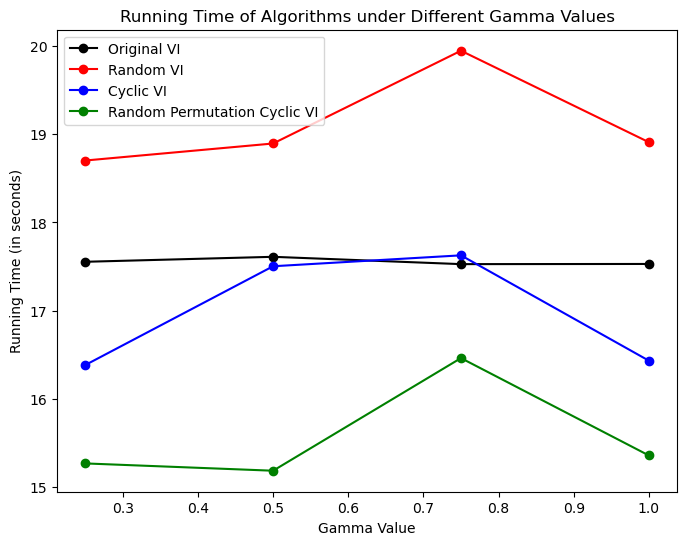

In [18]:
# Only kept random VI with proportion 0.90 since it consistenly got same policies as the other 
# algorithms. Therefore the respective times for the other algorithms were extrapolated as well

oVI_times_f = oVI_times[3:16:4]
rVI_times_f = rVI_times[3:16:4]  
cVI_times_f = cVI_times[3:16:4]
rpcVI_times_f = rpcVI_times[3:16:4]

plt.figure(figsize = (8, 6))

plt.plot(gammas, oVI_times_f, label = 'Original VI', marker = 'o', color = 'black')
plt.plot(gammas, rVI_times_f, label = 'Random VI', marker = 'o', color = 'red') 
plt.plot(gammas, cVI_times_f, label = 'Cyclic VI', marker = 'o', color = 'blue')
plt.plot(gammas, rpcVI_times_f, label = 'Random Permutation Cyclic VI', marker = 'o', color = 'green')

plt.xlabel('Gamma Value')
plt.ylabel('Running Time (in seconds)')
plt.title('Running Time of Algorithms under Different Gamma Values')
plt.legend()

plt.show()
